## Import Libraries

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import networkx as nx
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

## Read csv

In [5]:
data = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
data.shape

(282, 16)

In [8]:
data.head(3).T

,0,1,2
bytes_in,5602,30912,28506
bytes_out,12990,18186,13468
creation_time,2024-04-25T23:00:00Z,2024-04-25T23:00:00Z,2024-04-25T23:00:00Z
end_time,2024-04-25T23:10:00Z,2024-04-25T23:10:00Z,2024-04-25T23:10:00Z
src_ip,147.161.161.82,165.225.33.6,165.225.212.255
src_ip_country_code,AE,US,CA
protocol,HTTPS,HTTPS,HTTPS
response.code,200,200,200
dst_port,443,443,443
dst_ip,10.138.69.97,10.138.69.97,10.138.69.97


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

## Check null values

In [13]:
data.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [ ]:
# Fill missing values as needed
# data['bytes_in'].fillna(data['bytes_in'].median(), inplace=True)
# Drop missing values as needed
# data.dropna(subset=['src_ip', 'dst_ip'], inplace=True)

## Convert date-time object as data-time

In [15]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['time'] = pd.to_datetime(data['time'])

In [17]:
data[['creation_time', 'end_time', 'time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   creation_time  282 non-null    datetime64[ns, UTC]
 1   end_time       282 non-null    datetime64[ns, UTC]
 2   time           282 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3)
memory usage: 6.7 KB


In [18]:
data[['creation_time', 'end_time', 'time']].head()

,creation_time,end_time,time
0,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
1,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
2,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
3,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
4,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00


## Distribution of bytes in and bytes out

In [29]:
# data['bytes_in'].value_counts()
# Name: count, Length: 260, dtype: int64

In [25]:
# data['bytes_out'].value_counts()
# Name: count, Length: 239, dtype: int64

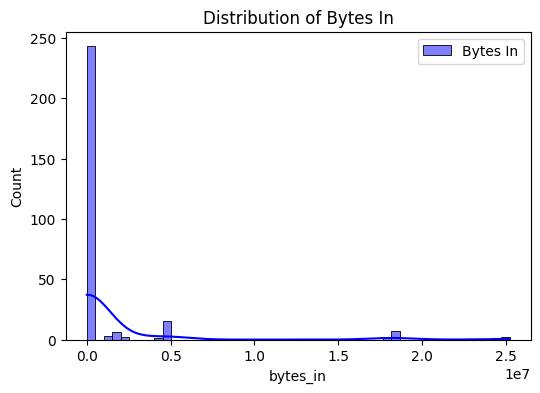

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(data['bytes_in'], bins=50, color='blue', kde=True, label='Bytes In')
plt.legend()
plt.title('Distribution of Bytes In')
plt.show()

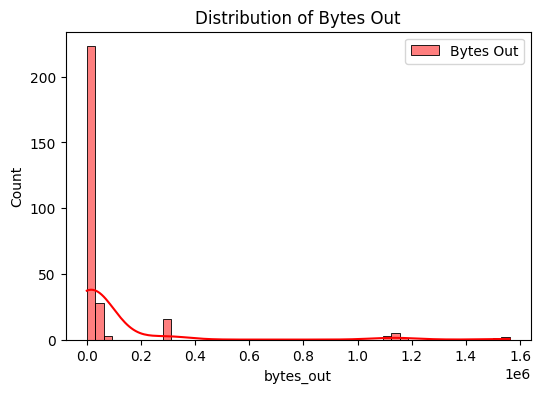

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(data['bytes_out'], bins=50, color='red', kde=True, label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes Out')
plt.show()

## Count of Protocols Used

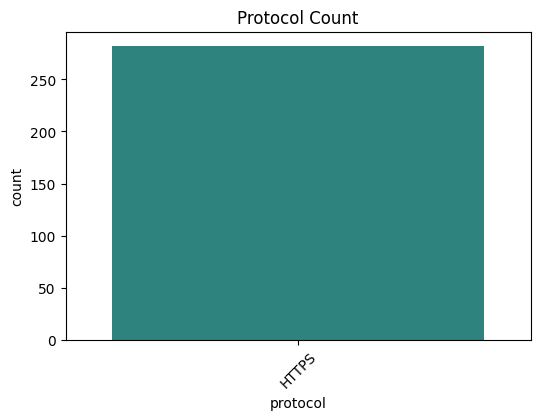

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='protocol', data=data, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering - Duration of the session in seconds

In [37]:
data['session_duration'] = (data['end_time'] - data['creation_time']).dt.total_seconds()
data[['end_time', 'creation_time', 'session_duration']].head()

,end_time,creation_time,session_duration
0,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00,600.0
1,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00,600.0
2,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00,600.0
3,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00,600.0
4,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00,600.0


## Feature Engineering - Average packet size in bytes

In [40]:
data['avg_packet_size'] = (data['bytes_in'] + data['bytes_out']) / data['session_duration']
data[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']].head()

,bytes_in,bytes_out,session_duration,avg_packet_size
0,5602,12990,600.0,30.986667
1,30912,18186,600.0,81.830000
2,28506,13468,600.0,69.956667
3,30546,14278,600.0,74.706667
4,6526,13892,600.0,34.030000


## Country-based Interaction Analysis

In [51]:
print(data['src_ip_country_code'][76:81])

76    AE
77    US
78    CA
79    NL
80    IL
Name: src_ip_country_code, dtype: object


In [48]:
print(data['src_ip_country_code'].value_counts())
print()
print(data['src_ip_country_code'].value_counts().index)
print()
print(data['src_ip_country_code'].value_counts().values)

src_ip_country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64

Index(['US', 'CA', 'DE', 'AT', 'NL', 'AE', 'IL'], dtype='object', name='src_ip_country_code')

[113  72  28  21  18  16  14]


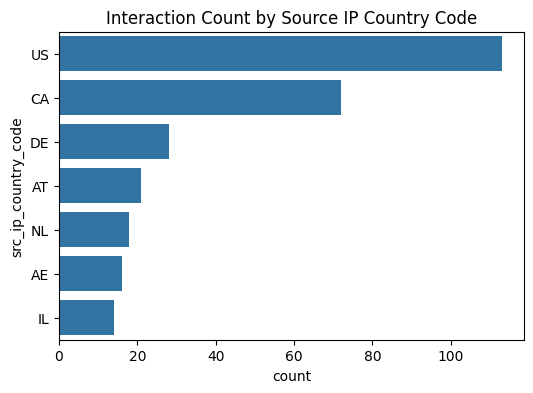

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(y='src_ip_country_code', data=data, order=data['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()

## Suspicious Activities Based on Ports

In [53]:
data[['dst_port', 'detection_types']].head()

,dst_port,detection_types
0,443,waf_rule
1,443,waf_rule
2,443,waf_rule
3,443,waf_rule
4,443,waf_rule


In [57]:
data['dst_port'].value_counts()

dst_port
443    282
Name: count, dtype: int64

In [58]:
data['detection_types'].value_counts()

detection_types
waf_rule    282
Name: count, dtype: int64

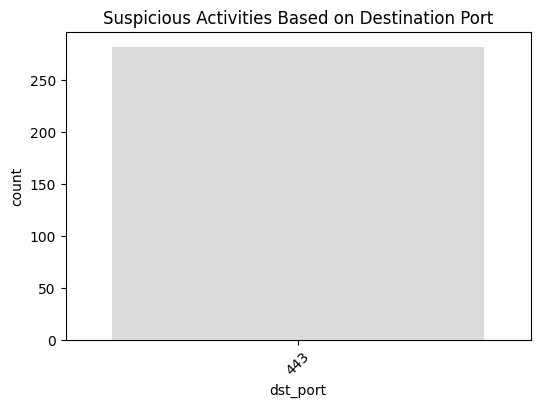

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='dst_port', data=data[data['detection_types'] == 'waf_rule'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

## Modeling: Anomaly Detection

In [ ]:
# 1. Modeling: Anomaly Detection - This step uses Isolation Forest, a common technique for detecting anomalies.

In [63]:
# Selecting features for anomaly detection
features = data[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]
features.head()

,bytes_in,bytes_out,session_duration,avg_packet_size
0,5602,12990,600.0,30.986667
1,30912,18186,600.0,81.830000
2,28506,13468,600.0,69.956667
3,30546,14278,600.0,74.706667
4,6526,13892,600.0,34.030000


In [64]:
# Initialize the model
model = IsolationForest(contamination=0.05, random_state=42)
model

IsolationForest(contamination=0.05, random_state=42)

In [66]:
# Fit and predict anomalies
# 'anomaly' is new custom column added

data['anomaly'] = model.fit_predict(features)
data['anomaly'].value_counts()

anomaly
 1    267
-1     15
Name: count, dtype: int64

In [67]:
data['anomaly'] = data['anomaly'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')
data['anomaly'].value_counts()

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64

In [74]:
data.loc[data['anomaly']=='Suspicious'][['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size', 'anomaly']]

,bytes_in,bytes_out,session_duration,avg_packet_size,anomaly
36,4190330,283456,600.0,7456.310000,Suspicious
87,1215594,64362,600.0,2133.260000,Suspicious
116,4827283,306181,600.0,8555.773333,Suspicious
132,1889834,34306,600.0,3206.900000,Suspicious
153,4869181,301752,600.0,8618.221667,Suspicious
169,18201558,1170896,600.0,32287.423333,Suspicious
176,18273120,1145109,600.0,32363.715000,Suspicious
185,18285525,1130944,600.0,32360.781667,Suspicious
200,18125238,1121958,600.0,32078.660000,Suspicious
211,18171403,1103358,600.0,32124.601667,Suspicious


In [75]:
data.loc[data['anomaly']=='Normal'][['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size', 'anomaly']].head(10)

,bytes_in,bytes_out,session_duration,avg_packet_size,anomaly
0,5602,12990,600.0,30.986667,Normal
1,30912,18186,600.0,81.830000,Normal
2,28506,13468,600.0,69.956667,Normal
3,30546,14278,600.0,74.706667,Normal
4,6526,13892,600.0,34.030000,Normal
5,3906,3488,600.0,12.323333,Normal
6,17748,29208,600.0,78.260000,Normal
7,4767917,291520,600.0,8432.395000,Normal
8,10538,15514,600.0,43.420000,Normal
9,9656,6380,600.0,26.726667,Normal


In [ ]:
# 2. Evaluate the anomaly detection model by checking its accuracy in identifying suspicious activities.

In [76]:
# Check the proportion of anomalies detected
print(data['anomaly'].value_counts())

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64


In [78]:
# Display anomaly samples
suspicious_activities = data[data['anomaly'] == 'Suspicious']
suspicious_activities.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,anomaly
36,4190330,283456,2024-04-25 23:30:00+00:00,2024-04-25 23:40:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:30:00+00:00,waf_rule,600.0,7456.310000,Suspicious
87,1215594,64362,2024-04-26 00:30:00+00:00,2024-04-26 00:40:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 00:30:00+00:00,waf_rule,600.0,2133.260000,Suspicious
116,4827283,306181,2024-04-26 01:00:00+00:00,2024-04-26 01:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 01:00:00+00:00,waf_rule,600.0,8555.773333,Suspicious
132,1889834,34306,2024-04-26 01:20:00+00:00,2024-04-26 01:30:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 01:20:00+00:00,waf_rule,600.0,3206.900000,Suspicious
153,4869181,301752,2024-04-26 01:40:00+00:00,2024-04-26 01:50:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 01:40:00+00:00,waf_rule,600.0,8618.221667,Suspicious


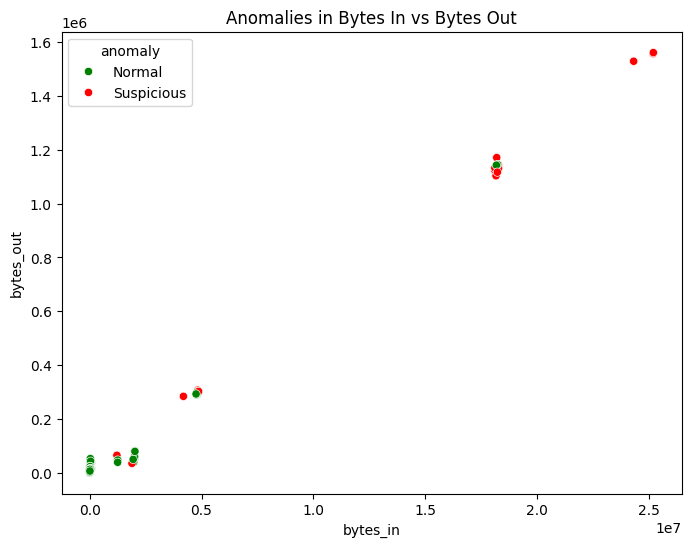

In [84]:
# 3. Visualization of Anomalies: Visualize bytes_in vs bytes_out with anomalies highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly', data=data, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()

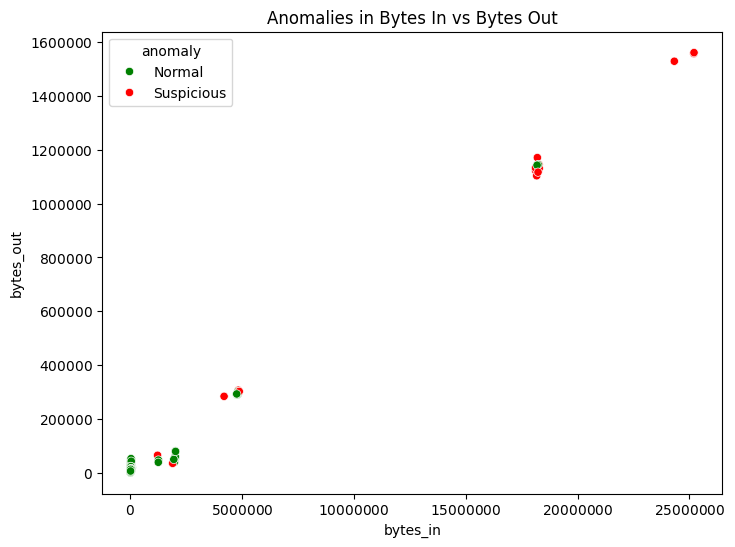

In [83]:
# 3. Visualization of Anomalies: Visualize bytes_in vs bytes_out with anomalies highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly', data=data, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')

# Get the current axes
ax = plt.gca()

# Create a ScalarFormatter that disables scientific notation
formatter_x = ticker.ScalarFormatter(useMathText=True)
formatter_x.set_scientific(False)
formatter_y = ticker.ScalarFormatter(useMathText=True)
formatter_y.set_scientific(False)

# Set the formatters for the x and y axes
ax.xaxis.set_major_formatter(formatter_x)
ax.yaxis.set_major_formatter(formatter_y)

# Display the plot
plt.show()